In [1]:
from keras.datasets import mnist

In [2]:
N = 5000

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()


In [4]:
import numpy as np

In [5]:
train_Xr = train_X.reshape(60000,28*28)

In [6]:
import umap.umap_ as umap

In [7]:
reducer = umap.UMAP(n_components = 2)


In [8]:
embedding = reducer.fit_transform(train_Xr[0:N])

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

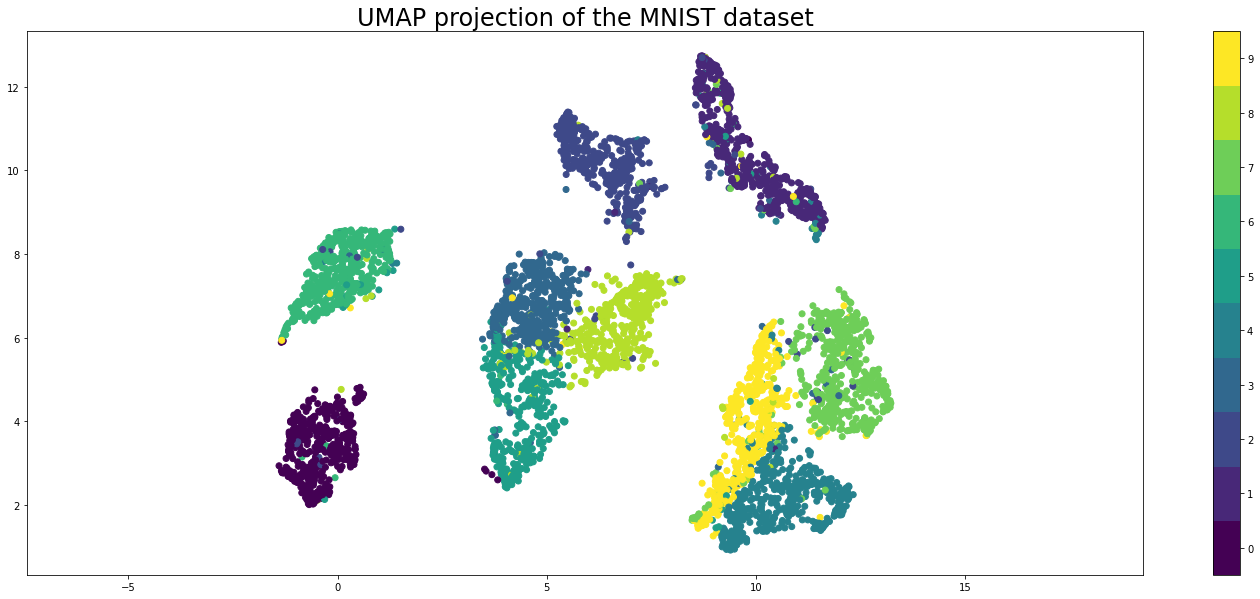

In [10]:


plt.figure(figsize=[25,10])
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = train_y[0:N])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the MNIST dataset', fontsize=24)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:

train = StandardScaler().fit_transform(train_Xr)
pca = PCA(n_components=2)
pca_res = pca.fit_transform(train[0:N])

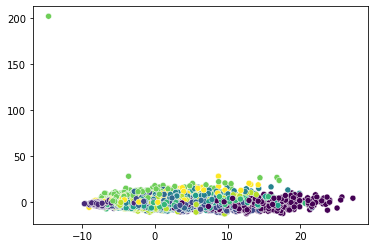

In [13]:
sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], c = train_y[0:N], palette = sns.hls_palette(10), legend = 'full');


In [14]:
from sklearn.manifold import TSNE


In [15]:
tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(train[0:N])



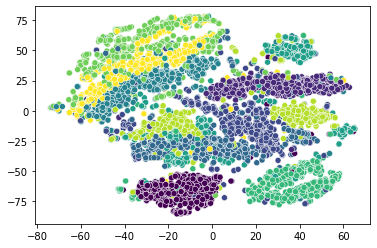

In [16]:
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], c = train_y[0:N], palette = sns.hls_palette(10), legend = 'full');

In [17]:
from sklearn.neighbors import KDTree

def sharpening_for_dr(data,lambda1 = .1,KNN_K = 50, NUM_ITR = 25, EPSIL = .0001):
    
    
    obs, dim = data.shape
    
    
    idx1 = 0
    idx2 = 0
    flag = 0
    h1 = 0
    gradient_rho = np.zeros(dim)
    ptCloud = np.zeros((obs,dim))
    shift = np.zeros(dim)
    tmp_location = np.zeros(dim)
    nMatches = 0
    
    location = np.zeros(dim)
    out_dist_sqr_tmp = np.zeros(KNN_K+1)
    ret_index_tmp = np.zeros(KNN_K+1)
    
    
    
    ptCloud = data.copy()
    
    while(flag < NUM_ITR):
        
        if(flag%5 ==0):
            print(flag)
        
        
        
        index = KDTree(ptCloud,leaf_size = KNN_K)
        out_dist_sqr_tmp_tot,ret_index_tmp_tot = index.query(ptCloud,k = KNN_K + 1)


        idx1 = 0
        while(idx1 < obs):
            
            
        
            location = ptCloud[idx1]                
            out_dist_sqr_tmp = out_dist_sqr_tmp_tot[idx1]
            ret_index_tmp = ret_index_tmp_tot[idx1]
            
            nMatches = len(out_dist_sqr_tmp)
            h1 = out_dist_sqr_tmp[nMatches-1]
                
            if(h1 != 0.0):
                neighbors_of_pt = np.zeros((nMatches,dim))
            
                idx2 = 0

                while(idx2 < nMatches):

                    neighbors_of_pt[idx2] = ptCloud[ret_index_tmp[idx2]]

                    idx2 += 1
                
                tmp_location = location

                idx2 = 0
                while(idx2 < dim):
                    gradient_rho[idx2] = 0
                    shift[idx2] = 0
                    idx2 +=1


                idx2 = 0

                while(idx2 < nMatches):

                    gradient_rho = gradient_rho - (((tmp_location - neighbors_of_pt[idx2]) * 2)/ (h1*h1))
                    idx2 += 1

                shift = gradient_rho/max(np.linalg.norm(gradient_rho),EPSIL)

                ptCloud[idx1] = ptCloud[idx1] + lambda1*shift
            
            idx1 += 1
        
        
        flag += 1
        
        
    
    return ptCloud
    
    


In [ ]:
train_Xrsd = sharpening_for_dr(train_Xr[0:N],.1,NUM_ITR =25,EPSIL = .0001)

0


In [ ]:
embedding2 = reducer.fit_transform(train_Xrsd[0:N])

In [ ]:
plt.figure(figsize=[25,10])
plt.scatter(
    embedding2[:, 0],
    embedding2[:, 1],
    c = train_y[0:N])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the MNIST dataset with cluster sharpening', fontsize=24)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()

In [ ]:
tsne = TSNE(n_components = 2, random_state=0)
tsne_res2 = tsne.fit_transform(train_Xrsd)

In [ ]:
sns.scatterplot(x = tsne_res2[:,0], y = tsne_res2[:,1], c = train_y[0:N], palette = sns.hls_palette(10), legend = 'full');

In [ ]:
pca_res2 = pca.fit_transform(train_Xrsd)
a_plot = sns.scatterplot(x = pca_res2[:,0], y = pca_res2[:,1], c = train_y[0:N], palette = sns.hls_palette(10), legend = 'full');
plt.show()
a_plot.set(xlim=(-10, 10))
a_plot.set(ylim=(6, 10))
plt.show()

In [ ]:
import pandas as pd
d2 = pd.read_csv("example_data_set_1/data_.txt",sep='\t',header=None)
d2.head()
d2a = d2.to_numpy()

In [ ]:
sd2a = sharpening_for_dr(d2a)

In [ ]:
embedding3 = reducer.fit_transform(d2a)
embedding4 = reducer.fit_transform(sd2a)

plt.figure(figsize=[25,10])
plt.scatter(
    embedding3[:, 0],
    embedding3[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the simulated dataset', fontsize=24)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()

plt.figure(figsize=[25,10])
plt.scatter(
    embedding4[:, 0],
    embedding4[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the simulated dataset, sharpened', fontsize=24)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()

In [ ]:
tsne_resd2a = tsne.fit_transform(d2a)
tsne_ressd2a = tsne.fit_transform(sd2a)


In [ ]:
sns.scatterplot(x = tsne_resd2a[:,0], y = tsne_resd2a[:,1], palette = sns.hls_palette(10), legend = 'full')

In [ ]:
sns.scatterplot(x = tsne_ressd2a[:,0], y = tsne_ressd2a[:,1], palette = sns.hls_palette(10), legend = 'full');

In [ ]:
atush = pd.read_csv("atush_v0.csv",low_memory = False)
atush.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


In [ ]:
atush["SEX_CAT"] = labelencoder.fit_transform(atush["SEX"])
atush["CIVSTAT_CAT"] = labelencoder.fit_transform(atush["CIVSTAT"])
atush["EDUC_CAT"] = labelencoder.fit_transform(atush["EDUC"])
atush["ETHNIC2_CAT"] = labelencoder.fit_transform(atush["ETHNIC2"])
atush["AGE_CAT"] = labelencoder.fit_transform(atush["AGE"])

atushn = atush.drop(columns = ["SEX","CIVSTAT","EDUC","ETHNIC2","AGE","SAMPLE","IDENT"])
A = np.nan_to_num(atushn.to_numpy())
M = len(A)
ri = np.random.choice(M,size = N, replace = False)
A  = A[ri,:]

In [ ]:
As = sharpening_for_dr(A)

In [ ]:
pca_res_atush = pca.fit_transform(A)
pca_res_atush2 = pca.fit_transform(As)

In [ ]:
tsne_res_atush = tsne.fit_transform(A)
tsne_res_atush2 = tsne.fit_transform(As)

In [ ]:
umap_res_atush = reducer.fit_transform(A)
umap_res_atush2 = reducer.fit_transform(As)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(10,random_state = 42)

In [ ]:
kmeans.fit_transform(A)
atushc = kmeans.labels_

In [ ]:
ipums = pd.read_csv("ipums_v0.csv")
ipums.head()

In [ ]:
ipums["REGION_CAT"] = labelencoder.fit_transform(ipums["REGION"])
ipums["STATEFIP_CAT"] = labelencoder.fit_transform(ipums["STATEFIP"])
ipums["METRO_CAT"] = labelencoder.fit_transform(ipums["METRO"])
ipums["EDUC_CAT"] = labelencoder.fit_transform(ipums["EDUC"])
ipums["SCHLCOLL_CAT"] = labelencoder.fit_transform(ipums["SCHLCOLL"])
ipums["EDUCYRS_CAT"] = labelencoder.fit_transform(ipums["EDUCYRS"])

ipums = ipums.drop(columns = ["CASEID","REGION","STATEFIP","METRO","WT06","WT20","EDUC","EDUCYRS","SCHLCOLL"])
B = np.nan_to_num(ipums.to_numpy())
M = len(B)
ri = np.random.choice(M,size = N, replace = False)
B  = B[ri,:]

In [ ]:
Bs = sharpening_for_dr(B)

In [ ]:
pca_res_ipums = pca.fit_transform(B)
pca_res_ipums2 = pca.fit_transform(Bs)
tsne_res_ipums = tsne.fit_transform(B)
tsne_res_ipums2 = tsne.fit_transform(Bs)
umap_res_ipums = reducer.fit_transform(B)
umap_res_ipums2 = reducer.fit_transform(Bs)

In [ ]:
kmeans.fit_transform(B)
ipumsc = kmeans.labels_

In [ ]:
V = np.load("7td/output/small/tfidf_small.npy")
M = len(V)
print(V.shape)

In [ ]:
Vs = sharpening_for_dr(V)
pca_res_text = pca.fit_transform(V)
pca_res_text2 = pca.fit_transform(Vs)
tsne_res_text = tsne.fit_transform(V)
tsne_res_text2 = tsne.fit_transform(Vs)
umap_res_text = reducer.fit_transform(V)
umap_res_text2 = reducer.fit_transform(Vs)

In [ ]:
kmeans.fit_transform(V)
textc = kmeans.labels_

In [ ]:
mnistcs = []
atushcs = []
ipumscs = []
textcs = []


for i in range(1,11):
    kmeansk = KMeans(i)
    
    if(i==10):
        mnistcs.append(train_y[0:N])
        kmeansk.fit_transform(A)
        atushcs.append(kmeansk.labels_)
        kmeansk.fit_transform(B)
        ipumscs.append(kmeansk.labels_)
        kmeansk.fit_transform(V)
        textcs.append(kmeansk.labels_)
  
    else:
        kmeansk.fit_transform(train_Xr[0:N])
        mnistcs.append(kmeansk.labels_) 
        kmeansk.fit_transform(A)
        atushcs.append(kmeansk.labels_)
        kmeansk.fit_transform(B)
        ipumscs.append(kmeansk.labels_)
        kmeansk.fit_transform(V)
        textcs.append(kmeansk.labels_)

In [ ]:
print(len(mnistcs[7]))

In [ ]:

from matplotlib.widgets import RadioButtons

import ipywidgets as widgets

from IPython.display import display,clear_output
import matplotlib
%matplotlib inline


In [ ]:
data = [
    [[pca_res,pca_res2],[tsne_res,tsne_res2],[embedding,embedding2],mnistcs],
    [[pca_res_ipums,pca_res_ipums2],[tsne_res_ipums,tsne_res_ipums2],[umap_res_ipums,umap_res_ipums2],atushcs],
    [[pca_res_atush,pca_res_atush2],[tsne_res_atush,tsne_res_atush2],[umap_res_atush,umap_res_atush2],ipumscs],
    [[pca_res_text,pca_res_text2],[tsne_res_text,tsne_res_text2],[umap_res_text,umap_res_text2],textcs],
    #extra atush for custom data label
    [[pca_res_atush,pca_res_atush2],[tsne_res_atush,tsne_res_atush2],[umap_res_atush,umap_res_atush2],ipumscs],


]

In [ ]:
global dset, method, sharp
dset = 0
method = 2
sharp = 0
cind = 10


In [ ]:
srad = widgets.RadioButtons(
    options=['Unsharpened', 'Sharpened'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Sharpening: ',
    disabled=False
)

mrad = widgets.RadioButtons(
    options=['UMAP','PCA', 'TSNE'],
    #value='UMAP', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Method: ',
    disabled=False
)

drad = widgets.RadioButtons(
    options=['MNIST', 'IPUMS', 'ATUSH','TEXT','CUSTOM'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Dataset: ',
    disabled=False
)

slider = widgets.IntSlider(
    value=10,
    min=3,
    max=10,
    step=1,
    description='N Clusters: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

path = widgets.Text(
    value='atush_v1.csv',
    placeholder='atush_v1.csv',
    description='Path to Custom:',
    disabled=False
)

butt = widgets.Button(
    description='Load',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Load Custom Data',
 # (FontAwesome names without the `fa-` prefix)
)


display(path)
display(butt)

fig, ax = plt.subplots()
ax.scatter(embedding[:, 0],
    embedding[:, 1],
    c = train_y[0:N])
plt.gca().set_aspect('equal', 'datalim')
plt.title("Unsharpened MNIST data with UMAP DR")

 
    
srad.observe(button,names = ['value'])
display(srad)
slider.observe(button,names = ['value'])

def load_data(label):
    
    try:
        print("Please allow some time for your data to load.")
        dfd = pd.read_csv(path.value)
        D = np.nan_to_num(dfd.to_numpy())
        M = len(D)
        ri = np.random.choice(M,size = N, replace = False)
        D  = D[ri,:]


        Ds = sharpening_for_dr(D)
        

        pca_res_d = pca.fit_transform(D)
        pca_res_d2 = pca.fit_transform(Ds)
        tsne_res_d = tsne.fit_transform(D)
        tsne_res_d2 = tsne.fit_transform(Ds)
        umap_res_d = reducer.fit_transform(D)
        umap_res_d2 = reducer.fit_transform(Ds)

        dcs = []

        for i in range(3,11):
            kmeansk = KMeans(i)


            kmeansk.fit_transform(D)
            dcs.append(kmeansk.labels_)

        data[4] = [[pca_res_d,pca_res_d2],[tsne_res_d,tsne_res_d2],[umap_res_d,umap_res_d2],dcs]
        print("Data successfully loaded!")
    except Exception as e:
        
        print("Error loading data." + str(e))

def button(label):
    
    do = drad.value
    d3 = {'MNIST':0, 'IPUMS':1, 'ATUSH':2,'TEXT':3,'CUSTOM':4}
    dset = d3[do]
    mo = mrad.value
    d2 = {'PCA': 0, 'TSNE': 1,'UMAP':2}
    method = d2[mo]
    so = srad.value
    d = {'Unsharpened': 0, 'Sharpened': 1}
    sharp = d[so]
    
    e = data[dset][method][sharp]
    cind = slider.value - 1
    
    e = data[dset][method][sharp]
    c = data[dset][3][cind]
    
    fig1, ax1 = plt.subplots()
    
    
    ax1.scatter(e[:, 0],
    e[:, 1],
    c = c)
    """
    l.set_xdata(data[dset][method][sharp])
    l.set_ydata(data[dset][method][sharp])
    l.set_cdata(data[dset][method][4])
    """
    plt.title(srad.value + " " + drad.value + " data with " + mrad.value + " DR in " + str(slider.value)+" Clusters" )

    clear_output()
    display(path)
    display(butt)
    display(srad)
    display(mrad)
    display(drad)
    display(slider)

    display(fig1)

    fig1.clear()
    plt.close(fig1)
    plt.close()
    plt.cla()
    plt.clf()
    
mrad.observe(button,names = ['value'])
drad.observe(button,names = ['value'])
butt.on_click(load_data)

display(mrad)

display(drad)


display(slider)

plt.show()
fig.clear()
plt.close(fig)

